In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np


#### Pre processing img data 

In [2]:
# b. Load the training and testing data (CIFAR10)
train_dir = 'C:/Users/Acer/Downloads/dataset/cifar-10-img/train'
test_dir = 'C:/Users/Acer/Downloads/dataset/cifar-10-img/test'

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

test_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

# here batch_size is the number of images in each batch
train_batch_size = 5000
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=train_batch_size,
    class_mode='categorical'
)
test_batch_size = 1000
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=test_batch_size,
    class_mode='categorical'
)

Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.


#### Selecting only first batch with 5000 images as train and test data

In [3]:
x_train, y_train =  train_generator[0]
x_test, y_test = test_generator[0]

print(len(x_train))
print(len(x_test))

5000
1000


#### a. Load in a pre-trained CNN model trained on a large dataset

In [4]:
# Load VGG16 without top layers
weights_path = "C:/Users/Acer/Downloads/dataset/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(32, 32, 3))

#### b. Freeze parameters (weights) in model’s lower convolutional layers

In [5]:
for layer in base_model.layers:
    layer.trainable = False

#### c. Add custom classifier with several layers of trainable parameters to model

In [18]:
# Create the custom layers
x = keras.layers.Flatten()(base_model.output)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dropout(0.3)(x)
predictions = keras.layers.Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

#### d. Train classifier layers on training data available for task

In [49]:
# Train the model
model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

Epoch 1/2
157/157 [==============================] - 173s 1s/step - loss: 1.2889 - accuracy: 0.5436 - val_loss: 1.2217 - val_accuracy: 0.5940
Epoch 2/2
157/157 [==============================] - 175s 1s/step - loss: 1.0490 - accuracy: 0.6374 - val_loss: 1.1839 - val_accuracy: 0.6000


#### e. Fine-tune hyper parameters and unfreeze more layers as needed

In [40]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(32, 32, 3))

# freeze all layers first
for layer in base_model.layers:
    layer.trainable = False

# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 4:]:
    layer.trainable = True

# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=2, validation_data=(x_test, y_test))

Epoch 1/2
79/79 [==============================] - 76s 937ms/step - loss: 2.0703 - accuracy: 0.2086 - val_loss: 2.0102 - val_accuracy: 0.3110
Epoch 2/2
79/79 [==============================] - 80s 1s/step - loss: 1.4944 - accuracy: 0.4454 - val_loss: 1.2926 - val_accuracy: 0.5500


In [41]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

32/32 [==============================] - 5s 130ms/step


In [42]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Preditcted:  frog
Actual:  frog


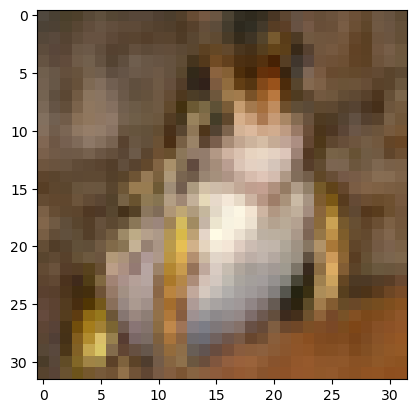

In [48]:
n = 18
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])